# 앙상블(Ensemble)

## Bagging meta-estimator

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [5]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
boston = load_boston()
diabetes = load_diabetes()

## Forests of randomized trees

- `sklearn.ensemble`
  - Random Forest
  - Extra-Trees

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### RandomForestClassifier

```
params = {
    "random_state": SEED,
    "max_features" : "sqrt", # 몇개의 Feature로 학습 시킬지 None : 전체피쳐
    "n_estimators" : 10, # 트리 개수
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

```

In [7]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [8]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.32403950691223143
avg score time: 0.026337051391601564
avg test score: 0.96


In [9]:
base_model.fit(X=iris.data, y = iris.target)
base_model["randomforestclassifier"].feature_importances_

array([0.08486253, 0.02582804, 0.3834212 , 0.50588823])

In [10]:
# wine dataset 을 학습시키고 중요한 feature 를 찾아보세요 

### Random Forests Regressor

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.26398348808288574
avg score time: 0.008462619781494141
avg test score: 0.6224840250754624


In [ ]:
# diabetes dataset을 학습시켜 보세요 

## AdaBoost
```
params = {
    'n_estimators' : [20, 22, 23, 24, 25], # 생성할 모델의 수 지정
    'learning_rate' : [0.4, 0.45, 0.5, 0.55, 0.6], # 학습률 지정
    'base_estimator__criterion' : ['gini', 'entropy'], # 트리의 학습방법 설정(엔트로피 or 지니)
    'base_estimator__max_features' : [7, 8], # 최대 피처 지정
    'base_estimator__max_depth' : [1, 2] # 부스팅 할 때 의 탐색 깊이

```

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.0829627513885498
avg score time: 0.008995914459228515
avg test score: 0.9466666666666667


In [ ]:
# wine data

In [ ]:
# cancer data

### AdaBoost 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.11600761413574219
avg score time: 0.006064271926879883
avg test score: 0.6057261338034257


In [ ]:
# diabetes

## Gradient Tree Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [12]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [13]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.21696076393127442
avg score time: 0.001089191436767578
avg test score: 0.9666666666666668


In [14]:
# wine

In [21]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.11038017272949219
avg score time: 0.004200077056884766
avg test score: 0.9609523809523809


In [22]:
# cancer

In [23]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.1614686965942383
avg score time: 0.0018335342407226562
avg test score: 0.9648657040832168


### Gradient Tree Boosting 회귀

In [15]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [16]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.1230699062347412
avg score time: 0.0009095191955566407
avg test score: 0.6769842493770849


In [17]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.09734611511230469
avg score time: 0.0009370326995849609
avg test score: 0.4078484302257312


## Extreme Gradient Boosting

```
params_xg = {
        'n_estimators': [750,1000,1250,1500,2000], # 생성할 모델의 수 지정
        'max_depth':[7,15,20], # 부스팅시 탐색 깊이
        'min_child_weight': [3, 10], # 관측치에 대한 가중치 합의 최소
        'gamma': [0.5,2, 5], #  감마 설정이 클수록 더 보수적인 알고리즘이 생성됩니다.
        'subsample': [0.6, 0.8], # 학습시킬 sample 의 비중
        'colsample_bytree': [0.7, 1.0]
        }

``

In [24]:
# !pip install xgboost
from xgboost import XGBClassifier

In [25]:
model = make_pipeline(
    StandardScaler(),
    XGBClassifier()
)

In [26]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.02383766174316406
avg score time: 0.000982666015625
avg test score: 0.9533333333333334


In [27]:
# wine

In [28]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.051722145080566405
avg score time: 0.0011070728302001952
avg test score: 0.9609523809523809


In [ ]:
# cancer

In [29]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.14994773864746094
avg score time: 0.0017326831817626952
avg test score: 0.9648657040832168


## 투표 기반 분류 (Voting Classifier)

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
  - 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  - 예측된 확률의 가중치 평균 (soft voting)

In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [34]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [35]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [ ]:
#wine

In [36]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, wine.data, wine.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [38]:
x = iris.data[:, [0, 2]]
y = iris.target

In [39]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                                          voting='soft', weights=[2,1,2])
model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

In [41]:
import numpy as np
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

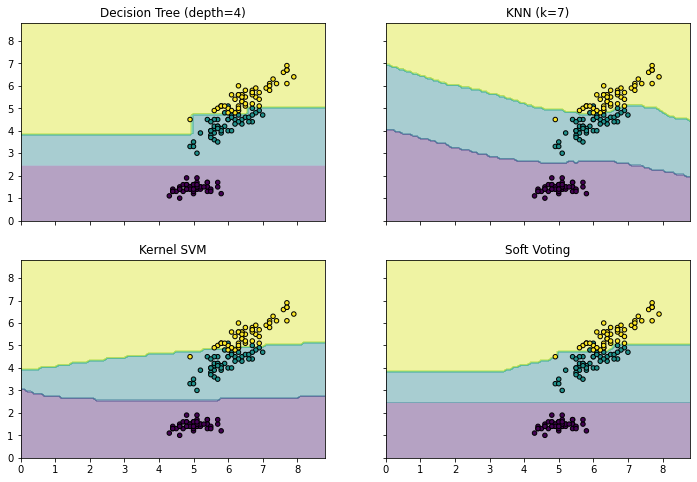

In [44]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           "Kernel SVM", 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [46]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [47]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print("R2: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.61 (+/- 0.23) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [48]:
x = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [49]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

In [50]:
x_min, x_max = x.min()-1, x.max() + 1
xx= np.arange(x_min-1, x_max+1, .1)

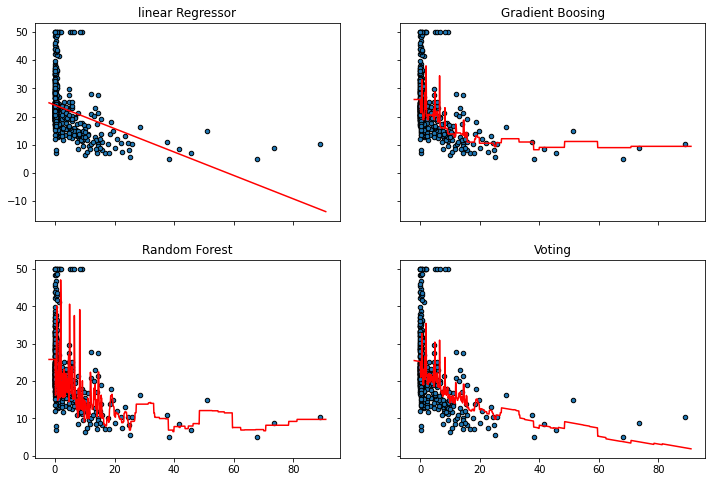

In [51]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['linear Regressor', 'Gradient Boosing', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [53]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [54]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [55]:
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y = boston.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.15376925468444824
avg score time: 0.004170370101928711
avg test score: 0.3246455870677536


#### 회귀식 시각화

In [56]:
x = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [57]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
reg = reg.fit(x, y)

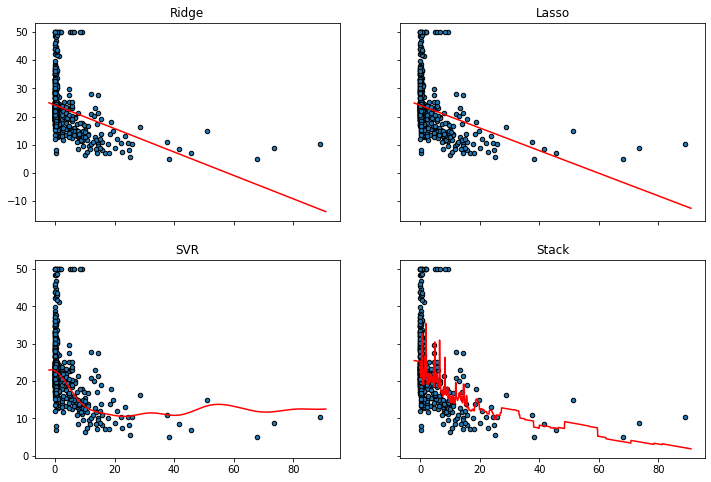

In [58]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [60]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('navie', GaussianNB())]

In [61]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier()
    )

In [62]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.3268891334533691
avg score time: 0.011181163787841796
avg test score: 0.9666666666666666


#### 결정 경계 시각화

In [63]:
x = iris.data[:, [0, 2]]
y = iris.target

In [64]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
stack = stack.fit(x, y)

In [65]:
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

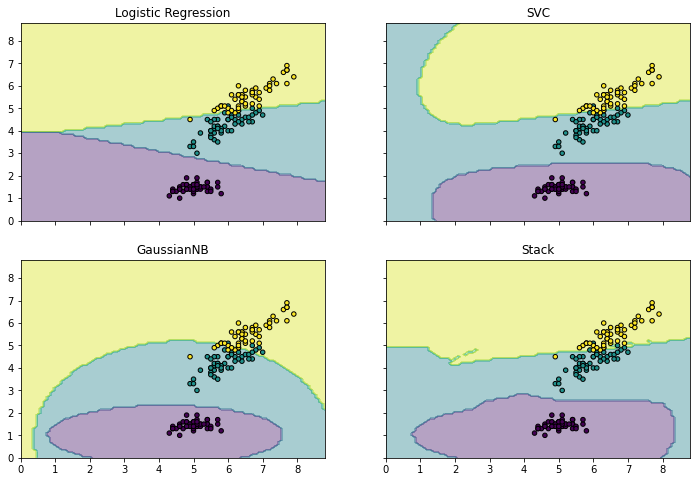

In [66]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', "GaussianNB", 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()